In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from IPython.display import display, HTML

In [3]:
# Generate a directed graph resembling a website structure
def generate_website_graph(num_pages=10, connection_prob=0.3):
    G = nx.DiGraph()
    pages = [f"Page {i}" for i in range(1, num_pages + 1)]
    G.add_nodes_from(pages)
    for page in pages:
        for potential_link in pages:
            if page != potential_link and random.random() < connection_prob:
                G.add_edge(page, potential_link)
    return G

# Create the graph
num_pages = 10
connection_prob = 0.4
G = generate_website_graph(num_pages, connection_prob)


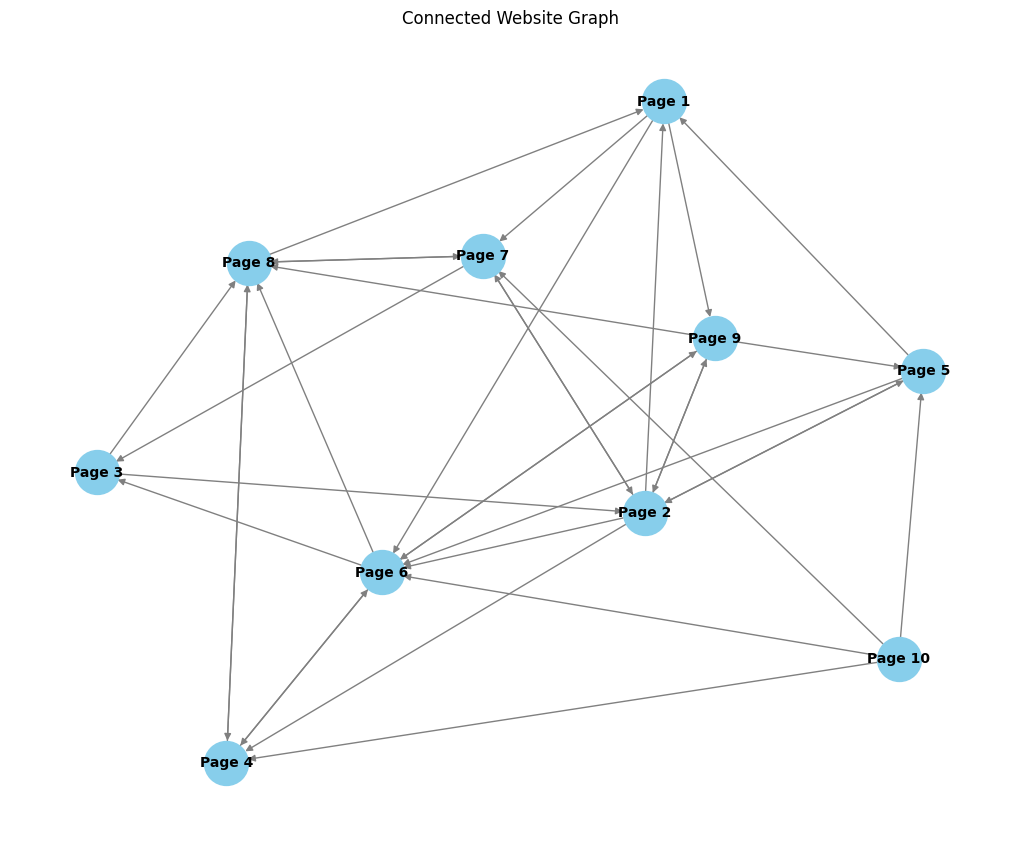

In [4]:
# Visualize the graph structure
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1000,
    node_color="skyblue",
    edge_color="gray",
    font_size=10,
    font_weight="bold",
)
plt.title("Connected Website Graph")
plt.show()


,PageRank Score
Page 1,0.097058
Page 2,0.114123
Page 3,0.077787
Page 4,0.115998
Page 5,0.053383
Page 6,0.145309
Page 7,0.112621
Page 8,0.179175
Page 9,0.089545
Page 10,0.015000


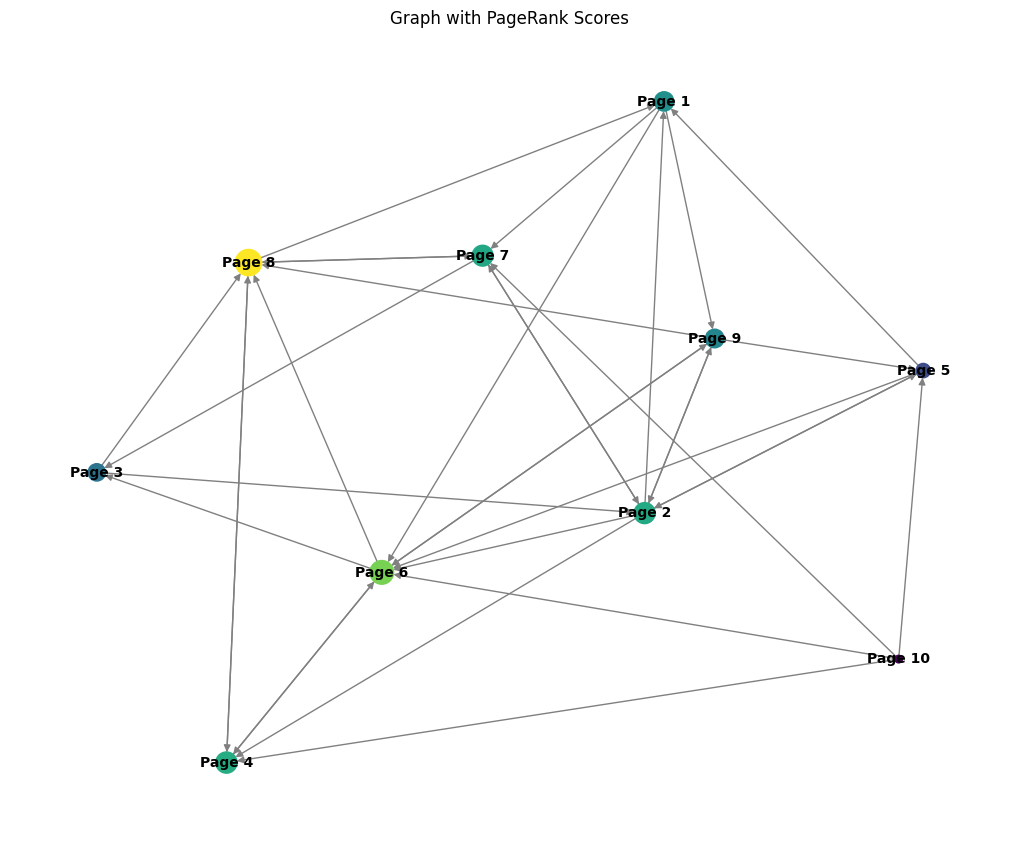

In [8]:
# Compute PageRank scores
pagerank_scores = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame.from_dict(pagerank_scores, orient='index', columns=['PageRank Score'])
display(pagerank_df)

# Visualize PageRank scores
plt.figure(figsize=(10, 8))
node_colors = [pagerank_scores[node] for node in G.nodes()]
node_sizes = [score * 2000 for score in pagerank_scores.values()]
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    edge_color="gray",
    font_size=10,
    font_weight="bold",
)
plt.title("Graph with PageRank Scores")
plt.show()


In [7]:
# Generate the adjacency matrix
adj_matrix = nx.to_numpy_array(G, nodelist=G.nodes())
df_adj_matrix = pd.DataFrame(adj_matrix, index=G.nodes(), columns=G.nodes())

# Display the adjacency matrix
display(HTML("<b>Adjacency Matrix:</b>"))
display(df_adj_matrix.style.format("{:.2f}").set_caption("Adjacency Matrix for the Graph"))


,Page 1,Page 2,Page 3,Page 4,Page 5,Page 6,Page 7,Page 8,Page 9,Page 10
Page 1,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
Page 2,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00
Page 3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
Page 4,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
Page 5,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
Page 6,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00
Page 7,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
Page 8,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
Page 9,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
Page 10,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00


In [10]:
# Display PageRank scores evolution over iterations
def pagerank_iterations(G, alpha=0.85, max_iter=20):
    num_nodes = len(G)
    pr = {node: 1 / num_nodes for node in G.nodes()}
    iterations = [pr.copy()]
    for _ in range(max_iter):
        new_pr = {}
        for node in G.nodes():
            new_pr[node] = (1 - alpha) / num_nodes + alpha * sum(
                pr[neighbor] / len(G[neighbor]) for neighbor in G.predecessors(node)
            )
        pr = new_pr
        iterations.append(pr.copy())
    return iterations

iterations = pagerank_iterations(G)
# Animate iterations as shown in previous example


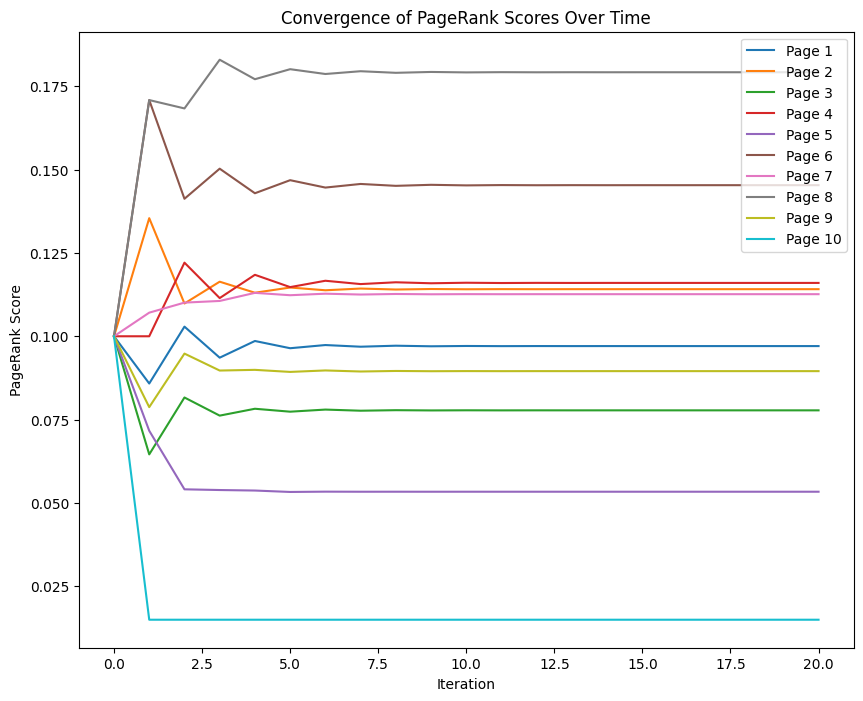

In [11]:
iterations = pagerank_iterations(G)
plt.figure(figsize=(10, 8))
for node in G.nodes():
    scores = [iteration[node] for iteration in iterations]
    plt.plot(range(len(iterations)), scores, label=node)

plt.xlabel("Iteration")
plt.ylabel("PageRank Score")
plt.legend()
plt.title("Convergence of PageRank Scores Over Time")
plt.show()


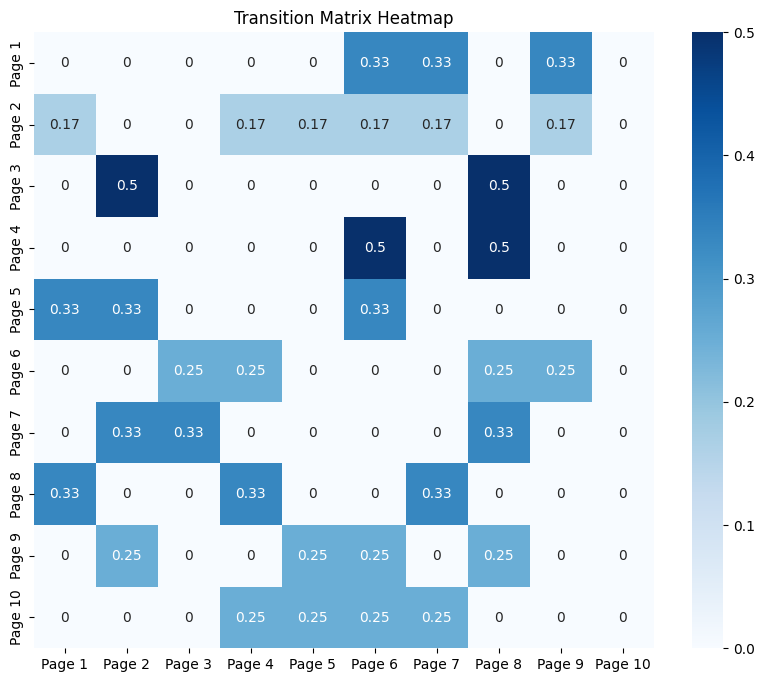

In [12]:
# Get the transition matrix (normalized adjacency matrix)
adj_matrix = nx.to_numpy_array(G, nodelist=G.nodes())
transition_matrix = adj_matrix / adj_matrix.sum(axis=1)[:, None]

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, cmap="Blues", annot=True, xticklabels=G.nodes(), yticklabels=G.nodes())
plt.title("Transition Matrix Heatmap")
plt.show()


In [6]:
# Perform a random walk
def random_walk(graph, start_node=None, steps=20):
    if start_node is None:
        start_node = random.choice(list(graph.nodes()))
    
    path = [start_node]
    current_node = start_node

    for _ in range(steps - 1):
        neighbors = list(graph.successors(current_node))
        if neighbors:
            current_node = random.choice(neighbors)
            path.append(current_node)
        else:
            break  # Stop if no outgoing links
    return path

# Simulate a random walk
steps = 20
start_node = random.choice(list(G.nodes()))
random_walk_path = random_walk(G, start_node, steps)

# Display the random walk path
display(HTML(f"<b>Random Walk Path:</b> {' ➔ '.join(random_walk_path)}"))


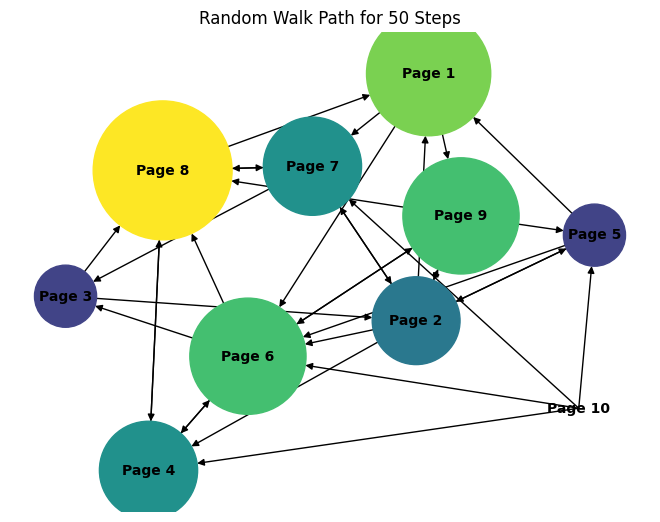

In [13]:
def random_walk_path_viz(graph, start_node=None, steps=50):
    path = random_walk(graph, start_node, steps)
    visit_counts = {node: 0 for node in graph.nodes()}
    for node in path:
        visit_counts[node] += 1

    # Visualize the random walk
    node_colors = [visit_counts[node] for node in graph.nodes()]
    node_sizes = [visit_counts[node] * 1000 for node in graph.nodes()]
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.viridis,
        font_size=10,
        font_weight="bold",
    )
    plt.title(f"Random Walk Path for {steps} Steps")
    plt.show()

random_walk_path_viz(G, start_node=random.choice(list(G.nodes())), steps=50)


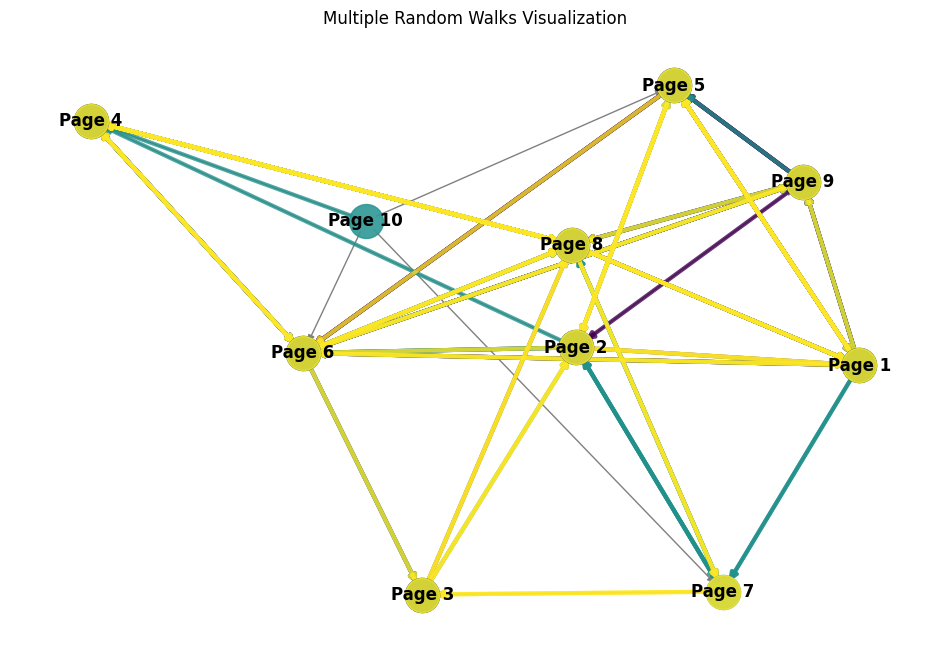

In [18]:
def multiple_random_walks(graph, num_walks=5, steps=30):
    walks = []
    for _ in range(num_walks):
        start_node = random.choice(list(graph.nodes()))
        walk_path = random_walk(graph, start_node, steps)
        walks.append(walk_path)
    return walks

walks = multiple_random_walks(G, num_walks=3, steps=50)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Layout for node positioning

# Create a color map for different random walks
colors = plt.cm.viridis(np.linspace(0, 1, len(walks)))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue", alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=1)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Highlight each random walk with different colors
for i, walk in enumerate(walks):
    walk_edges = [(walk[j], walk[j + 1]) for j in range(len(walk) - 1)]
    # Highlight edges of the random walk
    nx.draw_networkx_edges(G, pos, edgelist=walk_edges, edge_color=[colors[i]], width=3, alpha=0.8)
    
    # Highlight nodes of the random walk
    walk_nodes = set(walk)
    nx.draw_networkx_nodes(G, pos, nodelist=walk_nodes, node_size=600, node_color=[colors[i]], alpha=0.8)

plt.title("Multiple Random Walks Visualization")
plt.axis("off")
plt.show()